# <center> Numerical Method for Informatics</center>
## <center> Finite difference method: Denoising Image Processing</center>

This course is devoted to student of Undergraduate Student of Informatics, Telkom University. 

Detail of Course


*   Course Name: (CSH4403) Numerical Method for Informatics

*   Creator: Dr. Putu Harry Gunawan



---






# Image Processing in PDE

No doubt that mathematics research area can be expand to computer vision area such as image processing. Indeed, this area can be a new perspective in Mathematics and Computer Science. One of the popular model in image processing can be using partial differential equation (PDE) to describe the evolution of an image. Therefore, some numerical methods are needed in order to solve PDE in image processing. Let us observe the following partial differential equation in image processing, assume that I(t,x,y) is a pixel value of 2D image, then PDE for image is given as follows,

\begin{equation}
\frac{\partial I}{\partial t} = L(\Delta I) |\nabla I|
\end{equation}

where $L(\cdot)$ is a Lipschitz function and $\Delta$ is a Possion operator. This equation is known as Perona-Malik equation.

Example: denoising image

For instance, if L(\cdot) is equal to a constant 1, then the equation exactly becomes a diffusion equation. Thus, if this equation is implemented to image processing then this can be called a bluring or denoising technique. Please see the following images as the illustration of bluring.


<center><img src = "https://i.imgur.com/VZ96wb5.png
" align = "center"> </center>





**Image calling**

Size image is  (220, 220, 3)


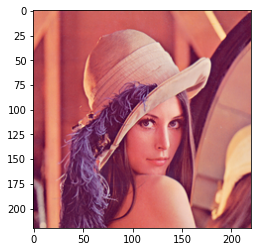

In [ ]:
# Python program to read  
# image using matplotlib 
  
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('https://i.imgur.com/r98BPWu.png') 
size = img.shape
print("Size image is ",size)

#Output Images 
plt.imshow(img)
plt.show()

**Grayscale Image**

Here we convert the image form RGB (3-dimension) into grayscale (1-dimension). Here we can use two ways for converting:



*   Grey = 0.3*R + 0.59*G  + 0.11*B 
*   Grey = (R +G + B)/3



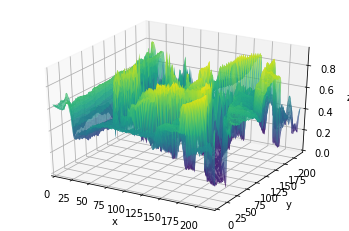

220


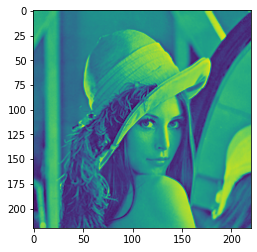

In [ ]:
Red = img[:,:,0]
Green = img[:,:,1] 
Blue = img[:,:,2]  

Gry = 0.3*Red + 0.59*Green + 0.11*Blue

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Gry, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set(xlim=(0, Lx), ylim=(0, Ly), zlim=(0,MaxGrey))
plt.show()

MaxGrey = Gry.max()
print(size[0])
#Output Images 
plt.imshow(Gry)
plt.show()

# Denoising problem with PDE

Using finite difference method  from Taylor expansion for Denoising problem, we have
\begin{align}
&\frac{I^{n+1}_{i,j} - I^{n}_{i,j}}{\Delta t} = D \left( \frac{I^n_{i+1,j} -2I^n_{i,j} + I^n_{i-1,j}}{\Delta x^2} + \frac{I^{n}_{i,j+1} - 2I^{n}_{i,j} + I^{n}_{i,j-1}}{\Delta y^2} \right),\\
&I_{i,j}^0=I_0, \\
&\{I_{i,j}^n\}_{j=0,M_y} =0,  \\
&\{I_{i,j}^n\}_{i=0,M_x} =0, 
\end{align}

<center><img src = "https://i.imgur.com/iSSECGf.png" align = "center"> </center>






**Example**


Please solve the heat equation
\begin{equation*}
    \frac{\partial u}{\partial t} = D \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
\end{equation*}
and the initial density of vehicle on domain $[0,Lx]\times[0,Ly]$,
\begin{equation*}
    u(x,y,0)=\nu(x,y)= \max(0, -10(x^2 +y^2) + 50)
\end{equation*}
Moreover, let use $N_x=N_y=$ image size, $T=10$, $D=1$, $L_x=L_y=$ image size. And please use Dirichlet boundary condition for boundary. 

Plot the plot at final time $Tfin= 1$, $Tfin= 1.5$ and $Tfin= 2$


The initial condition can be seen in the following Figure
<center><img src = "https://i.imgur.com/HTFcnVN.png" align = "center"> </center>

     
     
     

Setup and initial condition

dx =  1.004566210045662
dy =  1.004566210045662
dt =  0.2222222222222222


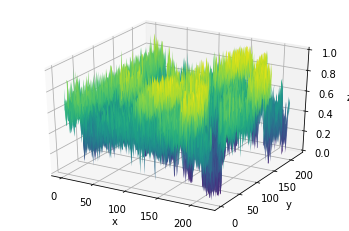

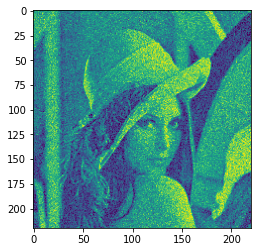

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from skimage.util import random_noise

#panjang gambar
Lx =  size[0]
Ly =  size[1]

Nx =  size[0]
Ny =  size[1]

D = 1

x = np.linspace(0,Lx,Nx) #for plot purpose
y = np.linspace(0,Ly,Ny) #for plot purpose
X,Y = np.meshgrid(x,y)
dx =  x[1] - x[0]
dy =  y[1] - y[0]
print("dx = ",dx)
print("dy = ",dy)

T = 10 
Tfin = 2 
#t = np.linspace(0,Tfin,T)
dt = Tfin/(T-1)
print("dt = ",dt)


#Give the gaussian nois gambar yg diberi nois
gauss = random_noise(Gry, mode='gaussian', seed=None, clip=True)

#Initial condition
I = np.zeros((Nx,Ny))
I_n = np.zeros((Nx,Ny))


for i in range(0,Nx):
  for j in range(0,Ny):
    I[i][j] = gauss[i][j]

#print(rho)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, I, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


plt.imshow(I)
plt.show()

**Loop process**

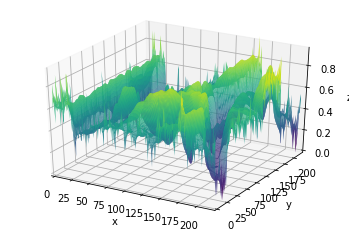

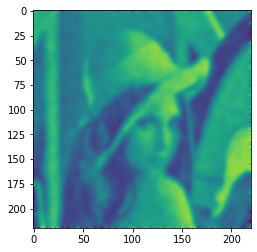

In [ ]:
time =0 
while(time <=Tfin):
  time = time + dt

  for i in range(1,Nx-1):
    for j in range(1,Ny-1):
      I_n[i][j] = I[i][j] +(D*dt/dx**2)*(I[i+1][j] - 2*I[i][j] + I[i-1][j]) + (D*dt/dx**2)*(I[i][j+1] - 2*I[i][j] + I[i][j-1])
  #boundary
  for i in range(0,Nx):
    I_n[i][0] = I[i][0]
    I_n[i][Ny-1]= I[i][Ny-1]

  for j in range(0,Ny):
    I_n[0][j] = I[0][j]
    I_n[Nx-1][j]= I[Nx-1][j]

  I = I_n

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, I, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set(xlim=(0, Lx), ylim=(0, Ly), zlim=(0,MaxGrey))
plt.show()

plt.imshow(I)
plt.show()

# Final Project

The topic of final project is about image processing using numerical approach




